# Cloud Constable Content-Based Threat Detection
______
### Stephen Camera-Murray, Himani Garg, Vijay Thangella
## Wikipedia Personal Attacks corpus
(https://figshare.com/articles/Wikipedia_Detox_Data/4054689)

115,864 verbatims out of which 13,590 are labelled aggressive and 102,274 are not.

Aggressive Speech                                      |  Normal Speech
:-----------------------------------------------------:|:------------------------------------------------------:
<img src="thumbsdown.png" alt="Aggressive" style="width: 200px;"/> | <img src="thumbsup.png" alt="Normal" style="width: 200px;"/>

### Step 3 - Build a Predictive Model
____

#### Import required libraries

In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

#### Load Email Features Dataframe

In [3]:
# load the labels file
verbatimFeatures = pd.read_csv ('data/verbatimFeatures.tab.gz', compression='gzip', sep='\t')
verbatimFeatures.head()

,aggressive,ability,able,absolute,absolutely,absurd,abuse,abusing,abusive,academic,...,yes,yesterday,yo,york,youbollocks,young,yourselfgo,youtube,ytmnd,zero
0,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Split Dataset into Test and Train

In [4]:
# set random seed for reproducibility
np.random.seed(222)

# create a random mask and split into train and test
msk = np.random.rand(len(verbatimFeatures)) < 0.7
train = verbatimFeatures[ msk]
test  = verbatimFeatures[~msk]

# let's confirm that our split worked
print ( 'Our training dataset has', round ( train.shape[0]/verbatimFeatures.shape[0] * 100, 2 ),
        '% of the observations and our test dataset has', round ( test.shape[0]/verbatimFeatures.shape[0] * 100, 2 ), '%' )

Our training dataset has 69.96 % of the observations and our test dataset has 30.04 %


#### Build a Naive Model

In [45]:
# all spam or all ham, depending on %

#### Build an SVM Model

#### Build a Random Forest Model

In [5]:
# Initialize a Random Forest classifier with 100 trees and a random seed for consistency
forest = RandomForestClassifier(n_estimators = 100, random_state = 24 ) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train.drop ("aggressive", axis=1 ), train["aggressive"] )

Now, let's make our predictions.

In [6]:
# predict train and test 
pred_train = forest.predict ( train.drop ("aggressive", axis=1 ) )
pred_test  = forest.predict ( test.drop  ("aggressive", axis=1 ) )

#### Evaluate our models
Note: We should add additional scores and maybe a confusion matrix

In [7]:
# now score our predictions based on accuracy
rforest_accuracy_train = metrics.accuracy_score(train["aggressive"], pred_train)
rforest_accuracy_test  = metrics.accuracy_score(test["aggressive"], pred_test)

# print our results
print ( 'Our random forest model has', round(rforest_accuracy_train*100,3), '% accuracy on our training dataset and',
        round(rforest_accuracy_test*100,3), '% accuracy on our test dataset' )

Our random forest model has 99.621 % accuracy on our training dataset and 93.506 % accuracy on our test dataset


Clearly our training dataset, with over 99% accuracy, is overfit. Our test dataset has over 93% accuracy, this may be a good candidate for further refinement.

#### Confusion matrix

We first create the helper function to plot the confusion matrix.

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round ( cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 4 )
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

We next calculate the confusion matrix, then plot it.

Normalized confusion matrix
[[ 0.9704  0.0296]
 [ 0.3366  0.6634]]


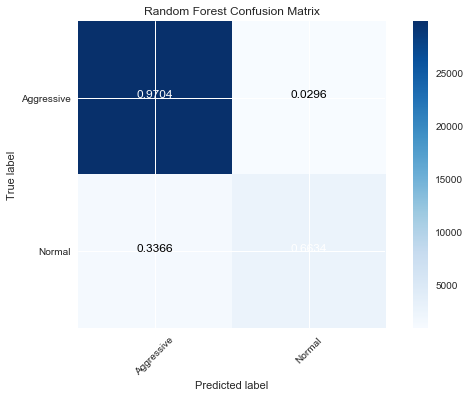

In [9]:
RandomForestCM = confusion_matrix ( test["aggressive"], pred_test )

# Plot normalized confusion matrix
plot_confusion_matrix(RandomForestCM, classes=['Aggressive','Normal'], normalize=True,
                      title='Random Forest Confusion Matrix')

plt.show()

#### Persist our final model

In [10]:
# persist the model in a .pkl file
joblib.dump ( forest, 'ThreatClassificationModel.pkl' )

['ThreatClassificationModel.pkl']